# Data Analysis and Visualization(Extra plots)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


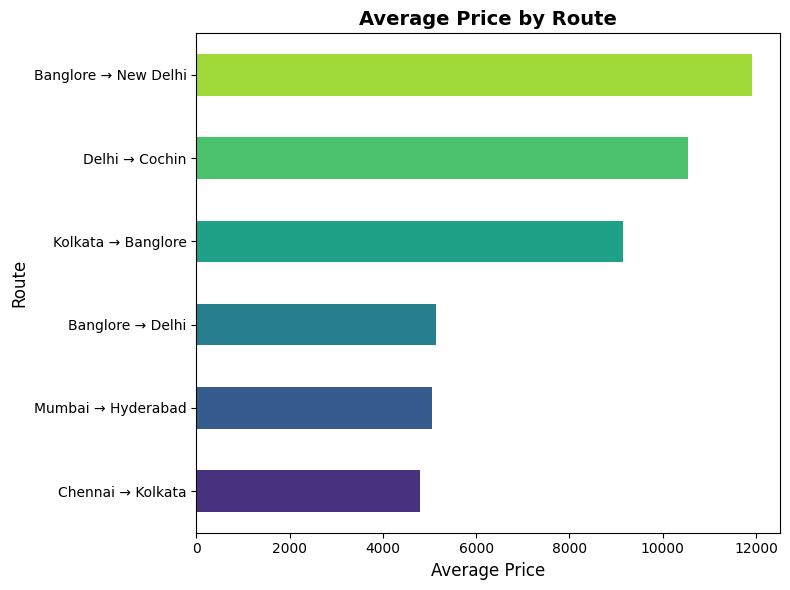

In [1]:
#Plot 1

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_csv("Flight.csv")
df.info()
df.isnull().sum()  # Check missing values
df.dropna(inplace=True)  # Remove rows with missing values

# Create 'Route' column
df['Route'] = df['Source'] + " → " + df['Destination']

# Compute average price per route
route_avg = df.groupby('Route')['Price'].mean().sort_values()

# Create a color palette based on number of routes
colors = sns.color_palette("viridis", len(route_avg))  # or try: "magma", "plasma", "coolwarm"

# Plot
plt.figure(figsize=(8, 6))
route_avg.plot(kind='barh', color=colors)

plt.title("Average Price by Route", fontsize=14, weight='bold')
plt.xlabel("Average Price", fontsize=12)
plt.ylabel("Route", fontsize=12)
plt.tight_layout()
plt.show()


## Analysis of plot 1
The code performs an exploratory data analysis on flight pricing data by first loading and cleaning the dataset, removing any rows with missing values. It then creates a new 'Route' feature by combining the 'Source' and 'Destination' columns to represent flight paths. Next, it calculates the average flight price for each unique route and sorts these values. Finally, it visualizes this information with a horizontal bar plot, using a color palette to distinguish different routes, allowing easy comparison of average prices across various flight routes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


C:\Users\nageshbhagelli\AppData\Local\Temp\ipykernel_20504\3643692887.py:13: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Journey_day'] = pd.to_datetime(df['Date_of_Journey']).dt.day_name()
C:\Users\nageshbhagelli\AppData\Local\Temp\ipykernel_20504\3643692887.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Journey_day', y='Price', data=df, order=day_order, palette='Set2')  # Try 'Set3', 'Pastel1', or 'husl'


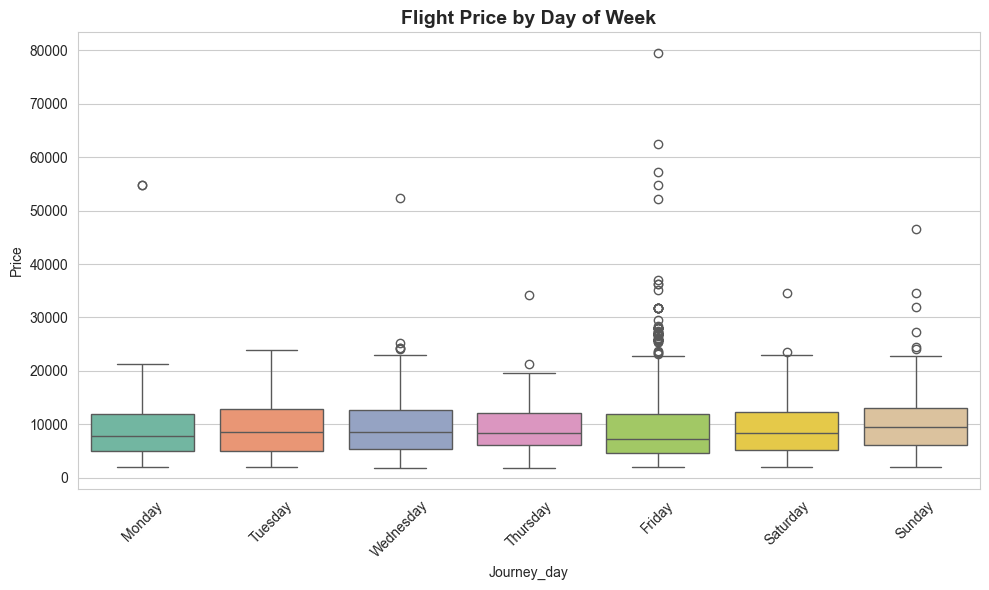

In [2]:
#Plot 2


# Extract day of week
df['Journey_day'] = pd.to_datetime(df['Date_of_Journey']).dt.day_name()

# Optional: Order the days for better readability
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Set plot style
sns.set_style("whitegrid")

# Create boxplot with a colorful palette
plt.figure(figsize=(10, 6))
sns.boxplot(x='Journey_day', y='Price', data=df, order=day_order, palette='Set2')  # Try 'Set3', 'Pastel1', or 'husl'

plt.title("Flight Price by Day of Week", fontsize=14, weight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Analysis of plot 2
This code analyzes how flight prices vary across different days of the week by first extracting the day name from the 'Date_of_Journey' column and creating a new 'Journey_day' feature. It then visualizes the distribution of flight prices for each weekday using a boxplot, ordered from Monday to Sunday for clarity. The boxplot highlights price variations, medians, and potential outliers by day, helping to identify patterns or trends in pricing depending on the day of travel.

C:\Users\nageshbhagelli\AppData\Local\Temp\ipykernel_20504\197830536.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Total_Stops'] = df['Total_Stops'].replace({'non-stop': 0, '1 stop': 1, '2 stops': 2,
C:\Users\nageshbhagelli\AppData\Local\Temp\ipykernel_20504\197830536.py:13: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Journey_day'] = pd.to_datetime(df['Date_of_Journey']).dt.day
C:\Users\nageshbhagelli\AppData\Local\Temp\ipykernel_20504\197830536.py:14: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Journey_mon

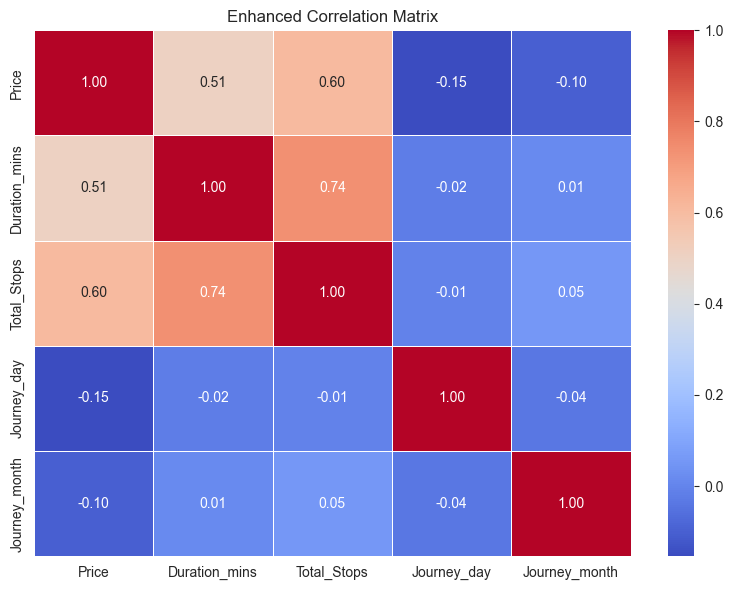

In [3]:
#Plot 3

# Convert Duration to minutes
df['Duration'] = df['Duration'].str.replace('h', 'h ').str.replace('m', 'm ')
df['Duration_mins'] = df['Duration'].apply(lambda x: sum(int(num[:-1]) * (60 if 'h' in num else 1)
                                                         for num in x.split() if num[-1] in ['h', 'm']))

# Convert Total_Stops to numeric
df['Total_Stops'] = df['Total_Stops'].replace({'non-stop': 0, '1 stop': 1, '2 stops': 2,
                                                '3 stops': 3, '4 stops': 4}).astype(float)

# Convert Date_of_Journey to numerical parts
df['Journey_day'] = pd.to_datetime(df['Date_of_Journey']).dt.day
df['Journey_month'] = pd.to_datetime(df['Date_of_Journey']).dt.month

# Now compute correlation
corr = df[['Price', 'Duration_mins', 'Total_Stops', 'Journey_day', 'Journey_month']].corr()

# Plot it
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Enhanced Correlation Matrix")
plt.tight_layout()
plt.show()



## Analysis of plot 3
This code transforms and prepares several features for a deeper numerical analysis of factors influencing flight prices. It first converts the 'Duration' column from a mixed string format (e.g., "2h 30m") into a total duration in minutes, enabling quantitative analysis. It then maps the categorical 'Total_Stops' column to numeric values representing the number of stops for each flight. Additionally, it extracts the day and month from the 'Date_of_Journey' as numeric features to capture temporal effects.

Using these processed numerical variables, the code calculates the correlation matrix to quantify relationships between flight price, duration, number of stops, and journey timing (day and month). This correlation matrix is then visualized as a heatmap, providing an easy-to-interpret overview of how strongly each factor is linearly related to flight prices. This analysis helps identify which features most impact pricing, such as whether longer durations or more stops are associated with higher costs, and if timing (day or month) plays a significant role.